In [1]:
import class_function as cf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../Data/result_6.csv')
X = data.drop(columns=['TARGET'])
Y = data.TARGET

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [14]:
x = pd.DataFrame()
for  col in X.columns:
    if X[col].ftype == 'int64:dense':
        x[col] = X[col]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3)

In [23]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_cla = xgb.XGBClassifier(max_depth=10, n_estimators=100, random_state=0)

#模型训练
xg_cla.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [24]:
binary_proba =  xg_cla.predict_proba(x_test)
proba_list = []
for i in range(len(binary_proba)):
    proba_list.append(binary_proba[i][1])
    
threshold_list = np.arange(0, 1, 0.01)
accuracy_list = []
recall_list = []
precision_list = []
MissingAlarm_list = []
FalseAlarm_list = []
F1_list = []
fpr_list = []

for threshold in threshold_list:
    #y_predicted = multi_xgb.predict(x_test, threshold)
    y_predicted = []
    
    for proba in proba_list:
        if proba > threshold:
            y_predicted.append(1)
        else:
            y_predicted.append(0)
            
    fbc = cf.For_binary_classifier(y_predicted, y_test)
    accuracy_list.append(fbc.accuracy)
    recall_list.append(fbc.recall)
    precision_list.append(fbc.precision)
    MissingAlarm_list.append(fbc.MissingAlarm)
    FalseAlarm_list.append(fbc.FalseAlarm)
    F1_list.append(fbc.F1)
    fpr_list.append(fbc.fpr)
    print('*' * 40)
    

                    Real +          Real -     
   Predict +         7505            84749     
   Predict -           0               0       

准确率： 0.08135148611442322
召回率： 1.0
精准率： 0.08135148611442322

漏警率： 0.0
虚警率： 0.9186485138855768
F1: 0.15046261490191362
fpr: 1.0
****************************************
                    Real +          Real -     
   Predict +         7500            84462     
   Predict -           5              287      

准确率： 0.08440826414030828
召回率： 0.9993337774816788
精准率： 0.08155542506687545

漏警率： 0.0006662225183211579
虚警率： 0.9184445749331246
F1: 0.1508037841696241
fpr: 0.9966135293631784
****************************************
                    Real +          Real -     
   Predict +         7453            82725     
   Predict -          52             2024      

准确率： 0.1027272530188393
召回率： 0.9930712858094604
精准率： 0.08264765242076781

漏警率： 0.006928714190539642
虚警率： 0.9173523475792322
F1: 0.15259564100201672
fpr: 0.9761177123033901
************

                    Real +          Real -     
   Predict +          203             838      
   Predict -         7302            83911     

准确率： 0.9117653435081405
召回率： 0.027048634243837442
精准率： 0.19500480307396734

漏警率： 0.9729513657561626
虚警率： 0.8049951969260327
F1: 0.047507605897495905
fpr: 0.009888022277548997
****************************************
                    Real +          Real -     
   Predict +          168             657      
   Predict -         7337            84092     

准确率： 0.9133479307130314
召回率： 0.022385076615589607
精准率： 0.20363636363636364

漏警率： 0.9776149233844104
虚警率： 0.7963636363636364
F1: 0.040336134453781515
fpr: 0.007752303861992472
****************************************
                    Real +          Real -     
   Predict +          129             529      
   Predict -         7376            84220     

准确率： 0.9143126585297114
召回率： 0.017188540972684876
精准率： 0.196048632218845

漏警率： 0.9828114590273151
虚警率： 0.803951367781155
F1: 0.031606

                    Real +          Real -     
   Predict +           2              13       
   Predict -         7503            84736     

准确率： 0.9185292778632905
召回率： 0.0002664890073284477
精准率： 0.13333333333333333

漏警率： 0.9997335109926716
虚警率： 0.8666666666666667
F1: 0.0005319148936170213
fpr: 0.00015339414034383887
****************************************
                    Real +          Real -     
   Predict +           2              11       
   Predict -         7503            84738     

准确率： 0.9185509571400698
召回率： 0.0002664890073284477
精准率： 0.15384615384615385

漏警率： 0.9997335109926716
虚警率： 0.8461538461538461
F1: 0.0005320563979781857
fpr: 0.00012979504182940212
****************************************
                    Real +          Real -     
   Predict +           2              10       
   Predict -         7503            84739     

准确率： 0.9185617967784595
召回率： 0.0002664890073284477
精准率： 0.16666666666666666

漏警率： 0.9997335109926716
虚警率： 0.8333333333333334


                    Real +          Real -     
   Predict +           0               0       
   Predict -         7505            84749     

准确率： 0.9186485138855768
召回率： 0.0
精准率： 0

漏警率： 1.0
虚警率： 1
F1: 0
fpr: 0.0
****************************************
                    Real +          Real -     
   Predict +           0               0       
   Predict -         7505            84749     

准确率： 0.9186485138855768
召回率： 0.0
精准率： 0

漏警率： 1.0
虚警率： 1
F1: 0
fpr: 0.0
****************************************
                    Real +          Real -     
   Predict +           0               0       
   Predict -         7505            84749     

准确率： 0.9186485138855768
召回率： 0.0
精准率： 0

漏警率： 1.0
虚警率： 1
F1: 0
fpr: 0.0
****************************************
                    Real +          Real -     
   Predict +           0               0       
   Predict -         7505            84749     

准确率： 0.9186485138855768
召回率： 0.0
精准率： 0

漏警率： 1.0
虚警率： 1
F1: 0
fpr: 0.0
*********

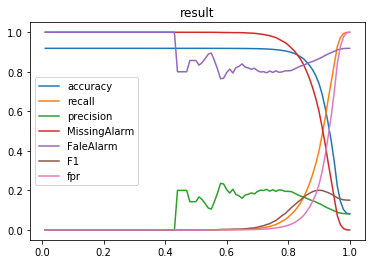

In [25]:
x_list = 1 - np.arange(0, 1, 0.01)
plt.title('result')
plt.plot(x_list, accuracy_list, label='accuracy')
plt.plot(x_list, recall_list, label='recall')
plt.plot(x_list, precision_list, label='precision')
plt.plot(x_list, MissingAlarm_list, label='MissingAlarm')
plt.plot(x_list, FalseAlarm_list, label='FaleAlarm')
plt.plot(x_list, F1_list, label='F1')
plt.plot(x_list, fpr_list, label='fpr')
plt.legend()
plt.show()

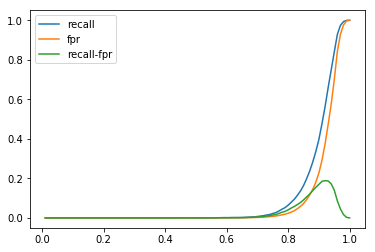

In [26]:
plt.plot(x_list, recall_list, label='recall')
plt.plot(x_list, fpr_list, label='fpr')
plt.plot(x_list, [recall_list[i] - fpr_list[i] for i in range(len(recall_list))], label='recall-fpr')
plt.legend()
plt.show()

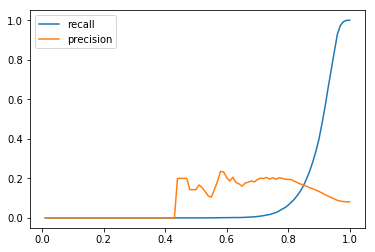

In [27]:
plt.plot(x_list, recall_list, label='recall')
plt.plot(x_list, precision_list, label='precision')
plt.legend()
plt.show()

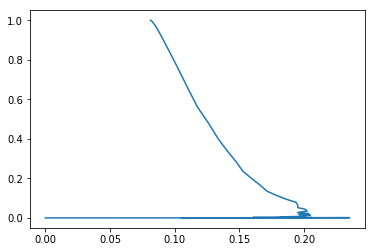

In [28]:
plt.plot(precision_list, recall_list, label='precision')
plt.show()

In [29]:
tpr_min_fpr = [recall_list[i] - fpr_list[i] for i in range(len(recall_list))]
ks = max(tpr_min_fpr)
ks

0.188399488149546